<a href="https://colab.research.google.com/github/Shaunak-Mukherjee/ME539-Scientific-ML/blob/main/Shaunak_Mukherjee_ME539_homework_02_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2


## References

+ Lectures 4-8 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name: Shaunak**
+ **Last Name: Mukherjee**
+ **Email: mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): No
+ **Which generative AI tool did you use (if applicable)?: N/A

## Problem 1 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [ ]:
P = np.array(
    [
        [0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
         0.03776221, 0.00131325, 0.03760817, 0.01770659],
        [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
         0.04778769, 0.01021053, 0.00324185, 0.02475319],
        [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
         0.02187814, 0.01925662, 0.0196836 , 0.01996279],
        [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
         0.02352593, 0.00300314, 0.00103487, 0.04071951],
        [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
         0.02032679, 0.02536328, 0.03552956, 0.01107725]
    ]
)

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [ ]:
print(f"p(X=2, Y=3) = {P[2, 3]:.3f}")

p(X=2, Y=3) = 0.034


A. Verify that all the elements of $P$ sum to one, i.e., that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [ ]:
# Since its a probability matrix, np.sum(P) should be 1

def element_sum(P):
    total_sum = np.sum(P)
    print(f"Sum of all elements in P: {total_sum:.2f}")
    return np.isclose(total_sum, 1.0)

result = element_sum(P)
print(f"Check sum result: {result}")

Sum of all elements in P: 1.00
Check sum result: True


B. Find the marginal probability density of $X$:

$$
p(x) = \sum_{y}p(x,y).
$$

You can represent this as a 5-dimensional vector.

In [ ]:
marginal_prob_density_X = np.sum(P, axis=1) # Summing along the rows
print(f'The marginal probability density of 𝑋 are: {marginal_prob_density_X}')

The marginal probability density of 𝑋 are: [0.20412376 0.25783426 0.19822111 0.17820324 0.16161762]


C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

In [ ]:
marginal_prob_density_Y = np.sum(P, axis=0) #Summing along the columns
print(f'The marginal probability density of Y are: {marginal_prob_density_Y}')

The marginal probability density of Y are: [0.14914347 0.14973252 0.09144527 0.09563304 0.09230073 0.15128076
 0.05914682 0.09709805 0.11421933]


D. Find the expectation and variance of $X$ and $Y$.

In [ ]:
import scipy.stats as st

# Possible values that X and Y can take
val_X = np.arange(5)
val_Y = np.arange(9)

# Discretize random variables X and Y with their values and previosly computed marginal probability densities
X = st.rv_discrete(values=(val_X, marginal_prob_density_X))
Y = st.rv_discrete(values=(val_Y, marginal_prob_density_Y))

# Expectations calculation
print(f"Expectation of X, E[X] = {X.expect():.3f}")
print(f"Expectation of Y, E[Y] = {Y.expect():.3f}")

# Variance calculation
print(f"Variance of X, V[X] = {X.var():.3f}")
print(f"Variance of Y, V[Y] = {Y.var():.3f}")

Expectation of X, E[X] = 1.835
Expectation of Y, E[Y] = 3.693
Variance of X, V[X] = 1.872
Variance of Y, V[Y] = 7.191


E. Find the expectation of $E[X + Y]$.

In [ ]:
# The expectation of E[X+Y] = E[X]+E[Y]
print(f"Expectation of E[X+Y]: {X.expect() + Y.expect():.3f}")

Expectation of E[X+Y]: 5.529


F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

In [ ]:
c_XY = 0.0

for i in range(len(val_X)):
    for j in range(len(val_Y)):
        x = val_X[i]
        y = val_Y[j]
        c_XY += (x - X.expect()) * (y - Y.expect()) * P[i, j]

print(f"Covariance of X and Y is C[X, Y] = {c_XY:.3f}")

# Compute Correlation coefficient as provided in lecture book
rho_XY = c_XY / (np.sqrt(X.var()) * np.sqrt(Y.var()))
print(f"The correlation coefficient is rho_XY = {rho_XY:.2f}")
correlation = "positively" if c_XY > 0 else "negatively" if c_XY < 0 else "not"

# Strenth of correlation (strong correlation being > 85%)
corr_threshold = 0.85
streth_of_correlation = "strongly" if abs(rho_XY) > corr_threshold else "weakly"

# Print the conclusions
print(f"X and Y are {correlation} correlated and they are {streth_of_correlation} correlated.")

Covariance of X and Y is C[X, Y] = 0.319
The correlation coefficient is rho_XY = 0.09
X and Y are positively correlated and they are weakly correlated.


G. Find the variance of $X + Y$.

In [ ]:
# Compute variance of X+Y
var_X_plus_Y = X.var() + Y.var() + 2 * c_XY
print(f"Variance of X+Y is V[X + Y] {var_X_plus_Y:.3f}")

Variance of X+Y is V[X + Y] 9.700


J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [ ]:
# Defining the prob variable
p_less_than_5 = 0.0

# Looping though X and Y values and checking the sums
for i in range(len(val_X)):

  for j in range(len(val_Y)):

    if val_X[i] + val_Y[j] <= 5:
            p_less_than_5+= P[i, j]

print(f"p(X + Y <= 5) = {p_less_than_5:.3f}")

p(X + Y <= 5) = 0.535


## Problem 2 - Zero correlation does not imply independence

The purpose of this problem is to show that zero correlation does not imply independence.
Consider the random variable $X$ and $Y$ following a standard normal distribution.
Define the random variable as $Z = X^2 + 0.01\cdot Y$.
You will show that the correlation between $X$ and $Z$ is zero even though they are not independent.

A. Take 100 samples of $X$ and $Z$ using numpy or scipy. Hint: First sample $X$ and $Y$ and use the samples to get $Z$.

In [ ]:
import numpy as np

# Number of samples
num_samples = 100

# Generate samples for X and Y with standard normal distribution
X_samples = np.random.normal(loc=0, scale=1, size=num_samples)
Y_samples = np.random.normal(loc=0, scale=1, size=num_samples)

# Calculate Z = X^2 + 0.01 * Y
Z_samples = X_samples**2 + 0.01 * Y_samples

Z_samples.size
print(Z_samples)

[3.39919279e-01 1.28274344e+00 9.46865563e-02 1.04647397e+00
 2.07757608e-02 3.21202575e-01 3.55671247e-02 4.69044842e-01
 7.72375212e-01 6.86254341e-01 1.62078840e+00 1.80287069e+00
 1.35310868e+00 5.02825969e+00 6.86456823e-01 6.54481413e-02
 7.58108074e-01 1.68396633e-01 1.93071367e-02 4.29521618e-01
 3.70875664e-01 2.56503951e+00 1.33993251e-02 7.20808371e-01
 3.30588272e+00 2.31515245e-01 1.17694015e-01 1.27597452e-01
 2.10435053e+00 5.07891094e-01 7.83580841e-02 1.31873878e-02
 1.34917489e+00 3.66677666e+00 6.03661844e-01 5.93215931e-01
 2.55521235e-01 2.20205879e+00 2.17228367e-01 7.30537834e-01
 1.49168141e+00 5.98037496e+00 4.61972177e+00 6.40992508e-01
 1.52192732e-01 9.21042095e-01 2.90913976e-01 7.89261863e-01
 2.44782206e+00 1.03791966e-02 1.66137318e+00 2.41327939e-02
 7.44583255e-02 3.24408138e-02 1.77474775e+00 1.16923079e+00
 1.72111002e-01 7.27441380e-02 1.12463302e+00 1.07668911e-02
 6.36259394e+00 6.05675231e-01 3.95963978e-01 1.92855378e+00
 1.40897161e+00 1.061009

B. Do the scatter plot between $X$ and $Z$.

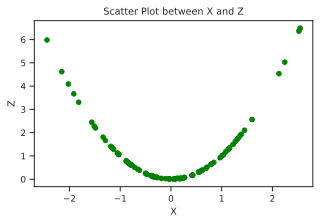

In [ ]:
# Scatter Plot Settings below
plt.figure(figsize=(5, 3))
plt.scatter(X_samples, Z_samples, color='green')
plt.title('Scatter Plot between X and Z')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(False)
plt.show()

C. Use the scatter plot to argue that $X$ and $Z$ are not independent.

**Answer:**

If X and Z are independent, the scatter plot would show no clear pattern or
trend. Points would be scattered randomly all around the plot. But in this scatter plot, there is dependence between X and Z where the sampled points  from these distributions follow a parabolic shape. We know pattern or structure such as clustering, curvature, or other non-random behavior indicates variable's dependence.

D. Use the samples you took to estimate the variance of $Z$.

In [ ]:
# Estimate the variance of Z
variance_Z = Z_samples.var()
print(f"Estimated sample variance of Z: {variance_Z:.4f}")

# Since we are sampling from a population, we should divide by N — 1. This corrects the bias in the estimation using Bessel’s correction. Since here sample size is large effect/difference should be negligible.
sample_variance = np.var(Z_samples, ddof=1)
print(f"Unbiased, sample Variance of Z: {sample_variance:.4f}")

Estimated sample variance of Z: 1.9932
Unbiased, sample Variance of Z: 2.0133


E. Use the samples you took to estimate the covariance between $X$ and $Z$.

In [ ]:
# covariance using the formula for covariance below, unbiased
cov_X_Z = np.sum((X_samples - X_samples.mean()) * np.transpose(Z_samples - Z_samples.mean())) / num_samples

print(f"Covariance between X and Z: {cov_X_Z:.3f}")

Covariance between X and Z: 0.120


F. Use the results above to find the correlation between $X$ and $Z$.

In [ ]:
# From definition of Correlation coefficien
corr_X_Z = cov_X_Z / np.sqrt(X_samples.var() * Z_samples.var())
print(f"Correlation coefficient between X and Z with sample size {num_samples}: {corr_X_Z:.5f}")

Correlation coefficient between X and Z with sample size 100: 0.08346


G. The correlation coefficient you get may not be very close to zero. This is due to the fact that we estimate it with Monte Carlo averaging. To get a better estimate, we can increase the number of samples. Try increasing the number of samples to 1000 and see if the correlation coefficient gets closer to zero.

In [ ]:
%%time
import numpy as np

# Number of samples
num_samples = 1000

# Generate samples for X and Y with standard normal distribution
X_samples = np.random.normal(loc=0, scale=1, size=num_samples)
Y_samples = np.random.normal(loc=0, scale=1, size=num_samples)

# Calculate Z = X^2 + 0.01 * Y
Z_samples = X_samples**2 + 0.01 * Y_samples

corr_X_Z = cov_X_Z / np.sqrt(X_samples.var() * Z_samples.var())
print(f"Correlation coefficient between X and Z with sample size {num_samples} is : {corr_X_Z:.5f}")

Correlation coefficient between X and Z with sample size 1000 is : 0.09532
CPU times: user 838 µs, sys: 0 ns, total: 838 µs
Wall time: 849 µs


So only very slightly close to zero

H. Let's do a more serious estimation of Monte Carlo convergence. Take 100,000 samples of $X$ and $Z$. Write code that estimates the correlation between $X$ and $Z$ using the first $n$ samples for $n=1,2,\ldots,100,000$. Plot the estimates as a function of $n$. What do you observe? How many samples do you need to get a good estimate of the correlation?


**P.S- I have shown two plots and associated code for it back to back, first one where I removed the first point and the second one where I did not remove the first point.**

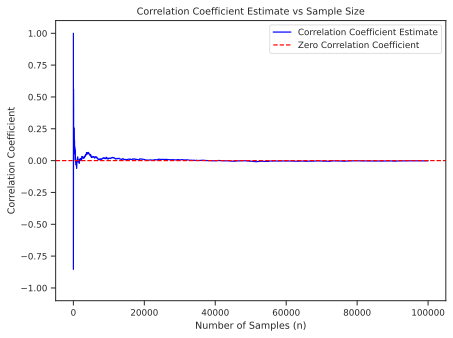

CPU times: user 56.3 s, sys: 410 ms, total: 56.7 s
Wall time: 1min 10s


In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt

# No. of samples to be used
num_samples = 100_000

# Note that I have to remove the first point because it is always zero
# and it has zero variance.

# Generate samples for X and Y from standard normal distribution
X_samples = np.random.normal(loc=0, scale=1, size=num_samples)
Y_samples = np.random.normal(loc=0, scale=1, size=num_samples)

# Calculate Z = X^2 + 0.01 * Y
Z_samples = X_samples**2 + 0.01 * Y_samples

# Initialize arrays
correlation_estimates = np.zeros(num_samples - 1)
var_X_n = np.zeros(num_samples - 1)
var_Z_n = np.zeros(num_samples - 1)

# Compute correlation coefficient estimates
for n in range(2, num_samples + 1):
    X_n = X_samples[:n]
    Z_n = Z_samples[:n]

    # Compute covariance between X_n and Z_n
    cov_X_Z_n = np.sum((X_n - X_n.mean()) * np.transpose(Z_n - Z_n.mean())) / n

    # Compute variance of X_n and Z_n
    var_X_n[n - 2] = np.var(X_n)
    var_Z_n[n - 2] = np.var(Z_n)

    # Calculate correlation coefficient estimate
    correlation_estimates[n - 2] = cov_X_Z_n / np.sqrt(var_X_n[n - 2] * var_Z_n[n - 2])


# Plotting Correlation Coefficient Estimates vs Sample Size
# plt.figure(figsize=(5, 5))
plt.plot(np.arange(2, num_samples + 1), correlation_estimates, color='b', label='Correlation Coefficient Estimate')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Correlation Coefficient')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient Estimate vs Sample Size')
plt.grid(False)
plt.ylim(-1.1,1.1)
plt.legend()
plt.tight_layout()
plt.show()


**This plot above is with first point removed.**
The correlation value is quite unstable at the very beginning upto 5,000-1,000 sample size and continues to converge close to zero for upto 30,000 iterations or so, but as numer of samples increases beyond 40,000, we see the correlation converge closer and closer to its true value of zero. Around the 40,000+ samples, the jitter of the value seems to have mostly diminished and hovers fairly stably around the true value

<timed exec>:31: RuntimeWarning: invalid value encountered in scalar divide


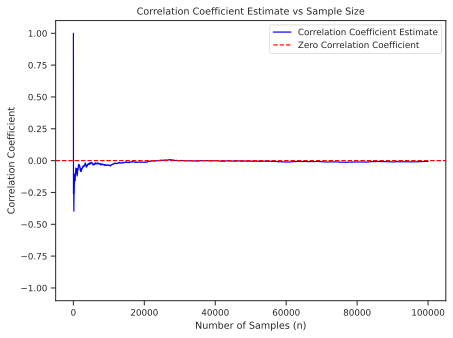

CPU times: user 49.3 s, sys: 479 ms, total: 49.8 s
Wall time: 50.4 s


In [ ]:
%%time
import matplotlib.pyplot as plt

# In this analysis the first point is not removed.
# No. of samples to be used
num_samples = 100_000

# Generate samples for X and Y from standard normal distribution
X_samples = np.random.normal(loc=0, scale=1, size=num_samples)
Y_samples = np.random.normal(loc=0, scale=1, size=num_samples)

# Calculate Z = X^2 + 0.01 * Y
Z_samples = X_samples**2 + 0.01 * Y_samples

# Initialize arrays
correlation_estimates = np.zeros(num_samples)
var_X_n = np.zeros(num_samples)
var_Z_n = np.zeros(num_samples)

# Compute correlation coefficient estimates
for n in range(1, num_samples + 1):
    X_n = X_samples[:n]
    Z_n = Z_samples[:n]

    # Compute covariance between X_n and Z_n
    cov_X_Z_n = np.sum((X_n - X_n.mean()) * np.transpose(Z_n - Z_n.mean())) / n

    # Compute variance of X_n and Z_n
    var_X_n[n - 1] = np.var(X_n)
    var_Z_n[n - 1] = np.var(Z_n)

    # Calculate correlation coefficient estimate
    correlation_estimates[n - 1] = cov_X_Z_n / np.sqrt(var_X_n[n - 1] * var_Z_n[n - 1])


# Plotting Correlation Coefficient Estimates vs Sample Size
# plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, num_samples + 1), correlation_estimates, color='b', label='Correlation Coefficient Estimate')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Correlation Coefficient')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient Estimate vs Sample Size')
plt.grid(False)
plt.ylim(-1.1,1.1)
plt.legend()
plt.tight_layout()
plt.show()

**Above plot doesn't have first point removed** you can see we get the scalar divide error since its always zero and has zero variance. Next, The correlation value is quite unstable at the very beginning and continues to be for the first 5000 iterations or so, but as numer of samples increases, we see the correlation converge closer and closer to its true value of zero. Around the 20,000 mark, the jitter of the value seems to have mostly diminished and hovers fairly stably around the true value. 60000+ samples show closest to true value of zero.


## Problem 3 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so-called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)), which connects the magnetic field $H$ to the magnetic flux density $B$.
The $B-H$ curve is a nonlinear function typically measured in the lab.
It appears in Maxwell's equations and is, therefore, crucial in the design of electrical machines.

The shape of the $B-H$ curve depends on the manufacturing process of the steel.
As a result, the $B-H$ differs across different suppliers but also across time for the same supplier.
The goal of this problem is to guide you through the process of creating a stochastic model for the $B-H$ curve using real data.
Such a model is the first step when we do uncertainty quantification for the design of electrical machines.
Once constructed, the stochastic model can generate random samples of the $B-H$ curve.
We can then propagate the uncertainty in the $B-H$ curve through Maxwell's equations to quantify the uncertainty in the performance of the electrical machine.

Let's use some actual manufacturer data to visualize the differences in the $B-H$ curve across different suppliers.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
Explaining how to upload data on Google Colab will take a while.
We will do it in the next homework set.
You should know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter Notebook.
I have written some code that allows you to put the data file in the right place without too much trouble.
Run the following:

In [ ]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/B_data.csv"
download(url)

If everything worked well, then the following will work:

In [ ]:
B_data = np.loadtxt('B_data.csv')
B_data

array([[0.        , 0.00490631, 0.01913362, ..., 1.79321352, 1.79337681,
        1.79354006],
       [0.        , 0.00360282, 0.01426636, ..., 1.8367998 , 1.83697627,
        1.83715271],
       [0.        , 0.00365133, 0.01433438, ..., 1.77555287, 1.77570402,
        1.77585514],
       ...,
       [0.        , 0.00289346, 0.01154411, ..., 1.7668308 , 1.76697657,
        1.76712232],
       [0.        , 0.00809884, 0.03108513, ..., 1.7774044 , 1.77756225,
        1.77772007],
       [0.        , 0.00349638, 0.0139246 , ..., 1.76460358, 1.76474439,
        1.76488516]])

The shape of this dataset is:

In [ ]:
B_data.shape

(200, 1500)

The rows (200) correspond to different samples of the $B-H$ curves (suppliers and times).
The columns (1500) correspond to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the specific value of $H$, say $H_j$. The values of $H$ are equidistant and identical; we will ignore them in this analysis.
Let's visualize some of the samples.

Here is one sample:

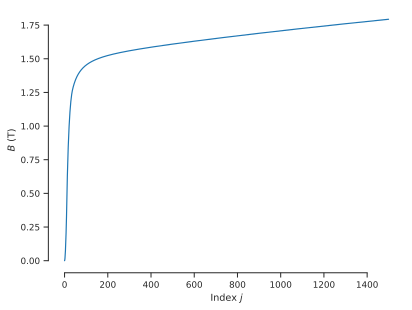

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[0, :])
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are five samples:

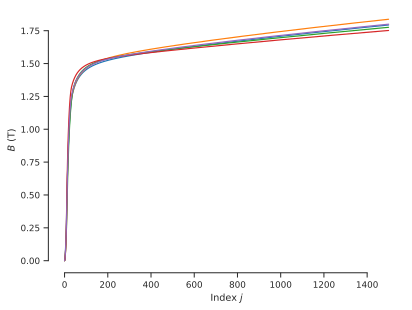

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:5, :].T)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

Here are all the samples:

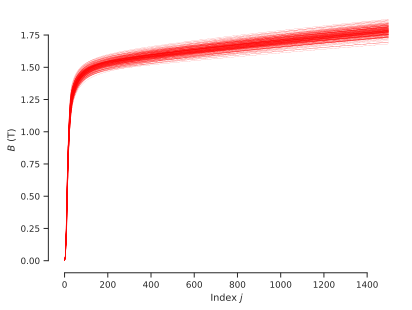

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
sns.despine(trim=True);

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable

$$
X = B(H_{500}),
$$

for this reason. Extract and do a histogram of the data for $X$:

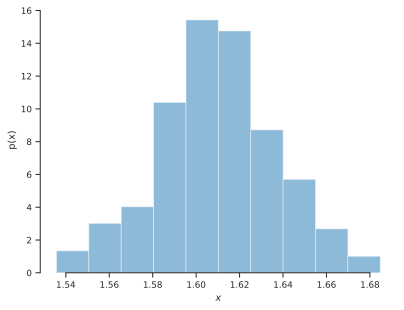

In [ ]:
X_data = B_data[:, 500]
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"p(x)")
sns.despine(trim=True);

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
A good choice for the mean is the empirical average of the data:

$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$

By the law of large numbers, this is a good approximation of the true mean as $N\to\infty$.
Later we will learn that this is also the *maximum likelihood* estimate of the mean.

So, the mean is:

In [ ]:
mu_500 = X_data.mean()
print(f"mu_500 = {mu_500:.2f}")

mu_500 = 1.61


Similarly, for the variance a good choice is the empirical variance defined by:

$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$

This also converges to the true variance as $N\to\infty$.
Here it is:

In [ ]:
sigma2_500 = np.var(X_data)
print(f"sigma_500 = {sigma2_500:.2e}")

sigma_500 = 7.42e-04


Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

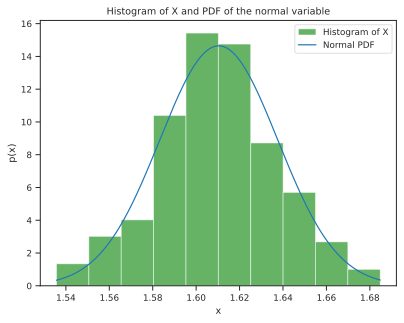

In [ ]:
# Histogram plot settings
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("p(x)")
ax.hist(X_data, bins=10, density=True, alpha=0.6, color='g', label='Histogram of X')


# Normal distribution plot settings
pdf_sample_points = np.linspace(X_data.min(), X_data.max(), 1000)
X_norm = st.norm(loc=mu_500, scale = np.sqrt(sigma2_500))

ax.plot(pdf_sample_points, X_norm.pdf(pdf_sample_points),label='Normal PDF');
plt.title('Histogram of X and PDF of the normal variable')
plt.legend()

B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is greater than 1.66 T.

In [ ]:
# Fit a normal distribution to the data
mu, std = st.norm.fit(X_data)

# Define the threshold value T (here 1.66)
Tesla = 1.66

# Calculate the probability that X > 1.66
probability = 1 - st.norm.cdf(Tesla, mu, std)

print(f"The probability that X is greater than {Tesla}T is {probability:.3f}")

The probability that X is greater than 1.66T is 0.034


C. Let us now consider another random variable

$$
Y = B(H_{1000}).
$$

Isolate the data for this as well:

In [ ]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

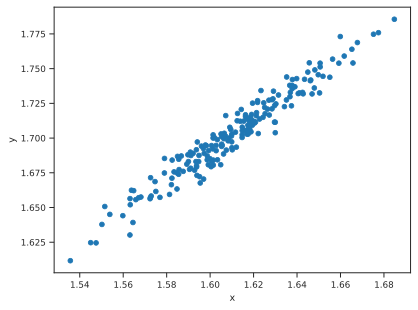

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_data, Y_data);

D. From the scatter plot, it looks like the random vector

$$
\mathbf{X} = (X, Y),
$$

follows a multivariate normal distribution. What would be the mean and covariance of the distribution?
First, organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [ ]:
XY_data = np.hstack([X_data[:, None], Y_data[:, None]])

In case you are wondering, the code above takes two 1D numpy arrays of the same size and puts them in a two-column numpy array. The first column is the first array, the second column is the second array. The result is a 2D numpy array.
We take sampling averages over the first axis of the array.

The mean vector is:

In [ ]:
mu_XY = np.mean(XY_data, axis=0)
print(f"mu_XY = {mu_XY}")

mu_XY = [1.61041566 1.70263681]


The covariance matrix is trickier.
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:

$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$

This formula converges as $N\rightarrow\infty$.
Here is the implementation:

In [ ]:
# Careful with np.cov because it requires you to transpose the matrix we defined in class
C_XY = np.cov(XY_data.T)
print(f"C_XY =")
print(C_XY)

C_XY =
[[0.00074572 0.00082435]
 [0.00082435 0.00096729]]


Use the covariance matrix `C_XY` to find the correlation coefficient between $X$ and $Y$.

In [ ]:
# Extract variances and covariance
var_X = C_XY[0, 0]
var_Y = C_XY[1, 1]
cov_XY = C_XY[0, 1]

# Calculate the correlation coefficient
correlation_XY = cov_XY / np.sqrt(var_X * var_Y)
print(f"Correlation coefficient between X and Y: {correlation_XY:.3f}")

Correlation coefficient between X and Y: 0.971


Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
<br>
**Answer:**
<br> They are positively correlated

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [ ]:
# Check if the matrix is positive definite, i.e. all eigenvalues are positive
def is_positive_definite_eigen(matrix):
    eigenvalues, _ = np.linalg.eigh(matrix) # Compute the eigenvalues and eigenvectors (ref https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)
    print(f"Eigenvalues are: {eigenvalues}")
    return np.all(eigenvalues > 0)



# Check using Eigenvalues
result_eigen = is_positive_definite_eigen(C_XY)
print(f"Is the matrix C_XY positive definite (Eigenvalues method)? {result_eigen}")

# # Double Check definiteness using principal of minors
# def is_positive_definite_principal_minors(matrix):
#     n = matrix.shape[0]
#     for i in range(1, n+1):
#         if np.linalg.det(matrix[:i, :i]) <= 0:
#             return False
#     return True
# # Check using Principal Minors
# result_principal_minors = is_positive_definite_principal_minors(C_XY)
# print(f"Is the matrix C_XY positive definite (Principal Minors method)? {result_principal_minors}")


Eigenvalues are: [2.47411589e-05 1.68827115e-03]
Is the matrix C_XY positive definite (Eigenvalues method)? True


F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

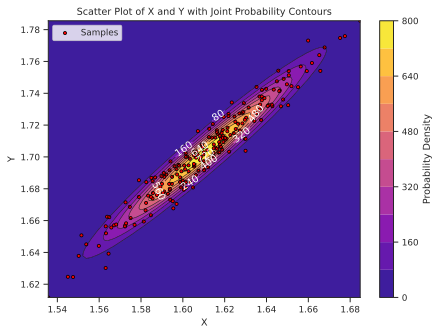

In [ ]:
# Create the multivariate normal distribution
rv = st.multivariate_normal(mean=mu_XY, cov=C_XY)

# Generate a grid of points
x = np.linspace(X_data.min(), X_data.max(), 100)
y = np.linspace(Y_data.min(), Y_data.max(), 100)
X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))

# Evaluate the PDF on the grid
Z = rv.pdf(pos)
# Plotting
plt.figure(figsize=(7, 5))
# Contour plot settings
contour = plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5,)
contour_filled = plt.contourf(X, Y, Z, levels=10, cmap="plasma", alpha = 0.9)
plt.clabel(contour, inline=1, fontsize=10,colors= 'white')

# Scatter plot of X and Y samples
plt.scatter(X_data, Y_data, color='red', edgecolors= 'black', s=10, label='Samples')
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y with Joint Probability Contours')
plt.legend()
plt.colorbar(contour_filled, label='Probability Density')
plt.show()

G. Now, consider each $B-H$ curve a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the magnetic flux density values at a fixed number of $H$-values. It is:

$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$

It is like $\mathbf{X} = (X, Y)$ only now we have 1,500 dimensions instead of $2$.

First, let's find the mean of this random vector:

In [ ]:
B_mu = np.mean(B_data, axis=0)
B_mu

array([0.        , 0.00385192, 0.01517452, ..., 1.78373703, 1.78389267,
       1.78404828])

Let's plot the mean on top of all the data we have:

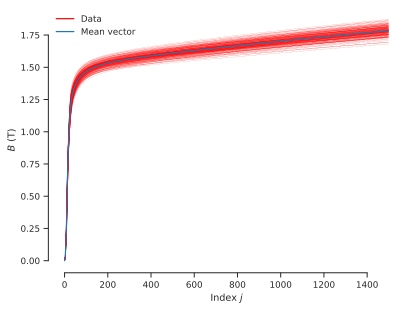

In [ ]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
plt.plot([],[], 'r', label='Data')
ax.plot(B_mu, label="Mean vector")
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [ ]:
B_cov = np.cov(B_data.T)
B_cov

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.16277948e-06, 4.41977479e-06, ...,
        3.18233676e-06, 3.18391580e-06, 3.18549316e-06],
       [0.00000000e+00, 4.41977479e-06, 1.68041482e-05, ...,
        1.22832828e-05, 1.22890907e-05, 1.22948922e-05],
       ...,
       [0.00000000e+00, 3.18233676e-06, 1.22832828e-05, ...,
        1.20268920e-03, 1.20293022e-03, 1.20317114e-03],
       [0.00000000e+00, 3.18391580e-06, 1.22890907e-05, ...,
        1.20293022e-03, 1.20317134e-03, 1.20341237e-03],
       [0.00000000e+00, 3.18549316e-06, 1.22948922e-05, ...,
        1.20317114e-03, 1.20341237e-03, 1.20365351e-03]])

Let's plot this matrix:

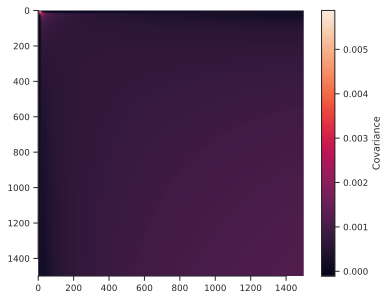

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c, label="Covariance")
sns.despine(trim=True);

The numbers are very small.
This is because the covariance depends on the units of the variables.
We need to do the same thing we did with the correlation coefficient: divide by the standard deviations of the variables.
Here is how you can get the correlation coefficients:

In [ ]:
# Note that I have to remove the first point because it is always zero
# and it has zero variance.
B_corr = np.corrcoef(B_data[:,1:].T)
B_corr

array([[1.        , 0.99986924, 0.99941799, ..., 0.08509827, 0.08512344,
        0.08514855],
       [0.99986924, 1.        , 0.99983894, ..., 0.08640313, 0.08642667,
        0.08645015],
       [0.99941799, 0.99983894, 1.        , ..., 0.08782484, 0.08784655,
        0.08786822],
       ...,
       [0.08509827, 0.08640313, 0.08782484, ..., 1.        , 0.99999998,
        0.9999999 ],
       [0.08512344, 0.08642667, 0.08784655, ..., 0.99999998, 1.        ,
        0.99999998],
       [0.08514855, 0.08645015, 0.08786822, ..., 0.9999999 , 0.99999998,
        1.        ]])

Here is the correlation visualized:

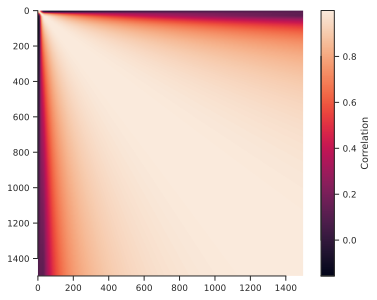

In [ ]:
fig, ax = plt.subplots()
c = ax.imshow(B_corr, interpolation='nearest')
plt.colorbar(c, label="Correlation")
sns.despine(trim=True);

The values are quite a bit correlated. This makes sense because the curves are all very smooth and look very much alike.

Let's check if the covariance is indeed positive definite:

In [ ]:
print("Eigenvalues of B_cov:")
print(np.linalg.eigh(B_cov)[0])

Eigenvalues of B_cov:
[-3.85054191e-16 -3.39495371e-16 -2.71195607e-16 ...  4.66244763e-02
  1.16644070e-01  1.20726782e+00]


Notice that several eigenvalues are negative, but they are too small. Very close to zero. This happens often in practice when you are finding the covariance of large random vectors. It arises from the fact that we use floating-point arithmetic instead of real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate average random vector using ``scipy.stats`` it would fail.
Try this:

In [ ]:
# B = st.multivariate_normal(mean=B_mu, cov=B_cov)

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution stays mostly the same. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [ ]:
# Pick the nugget here
nugget = 1e-12 *1000
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by multiple of 10.')

It worked! Move on.


Here is a iterative code to reach to the right nugget as well. Either way works I think.

In [ ]:
# Initial nugget value
org_nugget = 1e-12
max_iter = 100
multiplier = 10
for i in range(max_iter):
    if i==0:
      nugget = org_nugget
    # Print the current value of k for clarity
    print(f"Iteration {i}:")

    # This is the modified covariance matrix
    B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])

    # Try building the distribution:
    try:
        B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
        print('It worked! Move on.')
        print(f"Final nugget would be {org_nugget}*10^{i}" )
        break

    except:
        print('It did not work. Increase nugget by multiple of 10.')
        nugget = nugget*10  # Increase nugget by multiplying by 10

Iteration 0:
It did not work. Increase nugget by multiple of 10.
Iteration 1:
It did not work. Increase nugget by multiple of 10.
Iteration 2:
It did not work. Increase nugget by multiple of 10.
Iteration 3:
It worked! Move on.
Final nugget would be 1e-12*10^3


H. Now, you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$, you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to control steel production perfectly. Take ten samples of this random vector and plot them.

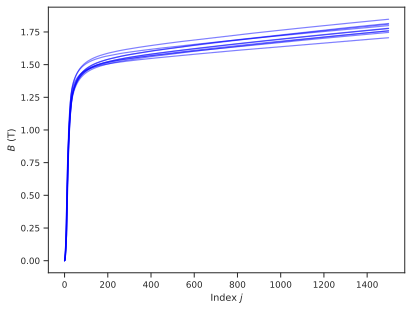

In [ ]:
fig, ax = plt.subplots()
ax.plot(B.rvs(10).T, 'blue', alpha=0.5);
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");

Congratulations!
You have made your first stochastic model of a physical field quantity.
You can now sample $B-H$ curves in a way that honors the manufacturing uncertainties.
This is the first step in uncertainty quantification studies.
The next step would be to propagate these samples through Maxwell's equations to characterize the effect on the performance of an electric machine.
If you want to see how that looks, look at {cite}`sahu2020` and {cite}`beltran2020`.

**End of Homework2!**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install inkscape texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libfontenc1 libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27
  libgslcblas0 libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5
  libhunspell-1.7-0 libidn12 libijs-0.35 libimage-magick-perl
  libimage-magick-q16-perl libjbig2dec0 libjxr-tools libjxr0 libkpath

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Shaunak_Mukherjee_ME539_homework-02_final.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Shaunak_Mukherjee_ME539_homework-02_final.ipynb to pdf
Failed to get connection
** (inkscape:24906): CRITICAL **: 16:51:03.943: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:24906): CRITICAL **: 16:51:03.943: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:24906): CRITICAL **: 16:51:03.944: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:24914): CRITICAL **: 16:51:04.824: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:24914): CRITICAL **: 16:51:04.825: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:24914): CRITICAL **: 16:51:04.825: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed
Failed to get connection
** (inkscape:24922): CRITICAL **: 16:51:05.491: dbus_g_proxy_new_for_name: assertion 'connection != 